In [12]:
import warnings; 
warnings.simplefilter('ignore')

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(r"C:\Users\ANJALI\Downloads\dataset.csv")

In [15]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [16]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [17]:
df.head()

y         ds
0  2926.000 2018-01-01
1  2687.531 2018-01-02
2  2793.000 2018-01-03
3  2394.000 2018-01-04
4  2660.000 2018-01-05

In [18]:
from prophet import Prophet

In [19]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

15:24:57 - cmdstanpy - INFO - Chain [1] start processing
15:24:58 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

ds        trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2018-01-01  3042.048205  799.560880  4030.688584  3042.048205  3042.048205   
1 2018-01-02  3042.784429  790.553895  4012.981469  3042.784429  3042.784429   
2 2018-01-03  3043.520654  762.493263  3970.832152  3043.520654  3043.520654   
3 2018-01-04  3044.256878  910.068524  4103.066676  3044.256878  3044.256878   
4 2018-01-05  3044.993103  900.328272  4039.382325  3044.993103  3044.993103   

   additive_terms  additive_terms_lower  additive_terms_upper       daily  \
0     -639.968658           -639.968658           -639.968658  469.981175   
1     -650.109098           -650.109098           -650.109098  469.981175   
2     -624.292184           -624.292184           -624.292184  469.981175   
3     -577.364032           -577.364032           -577.364032  469.981175   
4     -613.393704           -613.393704           -613.393704  469.981175   

   ...     weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
0  ...  16.612351     16.612351     16.612351 -1126.562183  -1126.562183   
1  ... -11.286966    -11.286966    -11.286966 -1108.803306  -1108.803306   
2  ...  -4.411160     -4.411160     -4.411160 -1089.862199  -1089.862199   
3  ...  22.469755     22.469755     22.469755 -1069.814962  -1069.814962   
4  ... -34.584504    -34.584504    -34.584504 -1048.790375  -1048.790375   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  -1126.562183                   0.0                         0.0   
1  -1108.803306                   0.0                         0.0   
2  -1089.862199                   0.0                         0.0   
3  -1069.814962                   0.0                         0.0   
4  -1048.790375                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  2402.079547  
1                         0.0  2392.675332  
2                         0.0  2419.228470  
3                         0.0  2466.892846  
4                         0.0  2431.599398  

[5 rows x 22 columns]

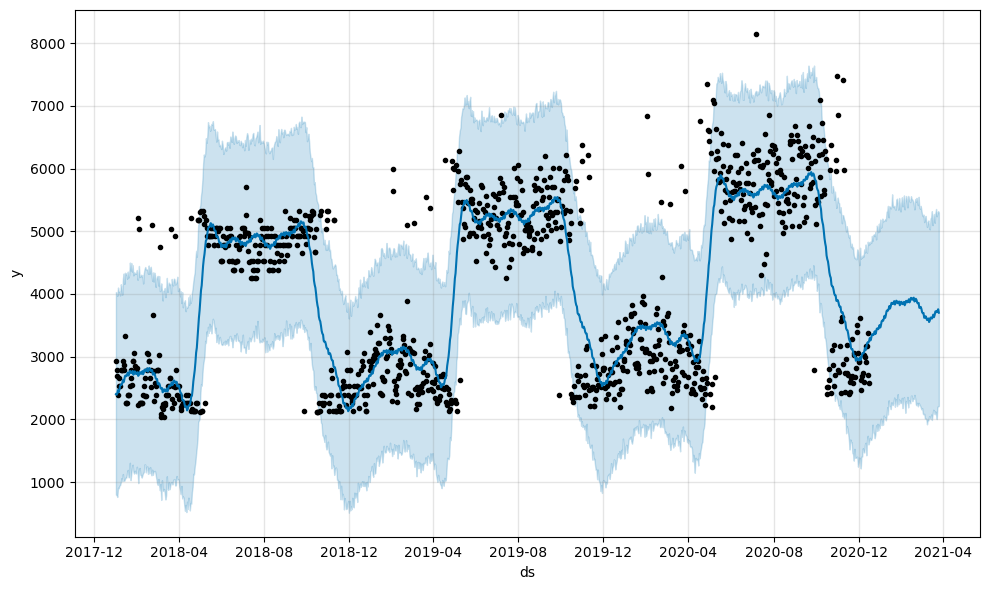

In [21]:
plot1 = m.plot(forecast)

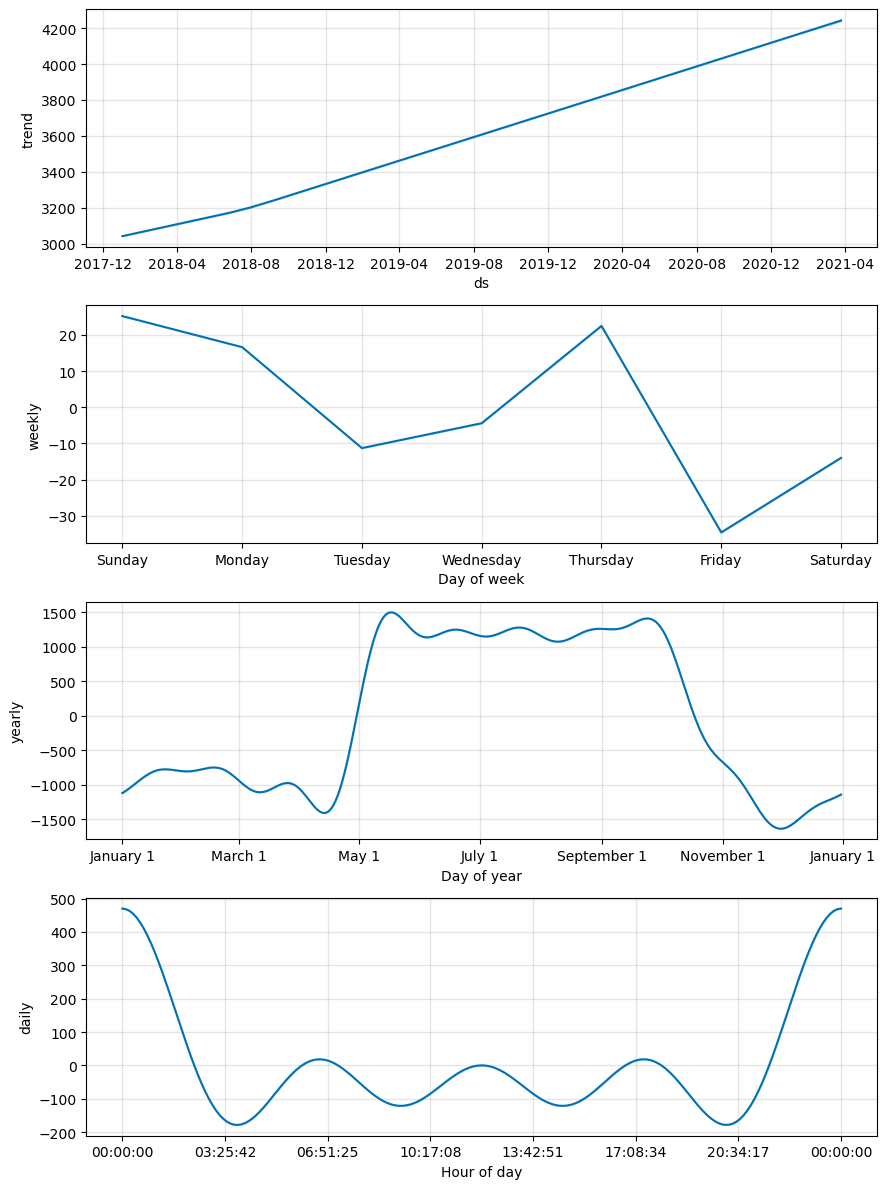

In [22]:
plt2 = m.plot_components(forecast)